In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [255]:
receipt_list = [
    ['Rote Zwiebeln', 'Rispen-Tomate'], # Nudelpfanne
    ['Rote Zwiebeln', 'Fleisch-Tomate'], # Nudelpfanne
    ['Frühlingszwiebeln', 'Tomate', 'Salatkopf'], # Nudelpfanne
    ['Frühlingszwiebeln', 'Tomate', 'Rucola'], # Nudelpfanne
    ['Salatkopf', 'Rispen-Tomate', 'Frühlingszwiebeln'], # Tomatensalat Variante 1
    ['Salatkopf', 'Cocktail-Tomate', 'Frühlingszwiebeln'], # Tomatensalat Variante 2
    ['Möhre', 'Petersilie'], # Vegane Carbonara
    ['Möhre', 'Schnittlauch'], # Vegane Carbonara
    ['Mini-Möhre', 'Petersilie'], # Normale Carbonara
    ['Kartoffeln', 'Knoblauchzehe'], # Katoffelgratain
    ['Kartoffeln', 'trockener Knoblauchzehe'], # Katoffelgratain
    ['Süßkartoffel', 'trockener Knoblauchzehe'], # Katoffelgratain
    ['Avocado', 'Rispen-Tomate', 'Knoblauchzehe', 'Frühlingszwiebeln'],
    ['Avocado', 'Rispen-Tomate', 'Knoblauchzehe', 'Rote Zwiebeln']
]

In [256]:
# flatten the list
receipts_flat_list = [item for sublist in receipt_list for item in sublist]

In [257]:
receipts_flat_list_no_dups = list(dict.fromkeys(receipts_flat_list))
receipts_flat_list_no_dups

['Rote Zwiebeln',
 'Rispen-Tomate',
 'Fleisch-Tomate',
 'Frühlingszwiebeln',
 'Tomate',
 'Salatkopf',
 'Rucola',
 'Cocktail-Tomate',
 'Möhre',
 'Petersilie',
 'Schnittlauch',
 'Mini-Möhre',
 'Kartoffeln',
 'Knoblauchzehe',
 'trockener Knoblauchzehe',
 'Süßkartoffel',
 'Avocado']

In [258]:
# create boolean mask
receipt_list_bool = []
for index, element in enumerate(receipt_list):
    receipt_list_bool.append(np.in1d(receipts_flat_list_no_dups, receipt_list[index]))

In [259]:
cosine_similarity_matrix = cosine_similarity(receipt_list_bool)

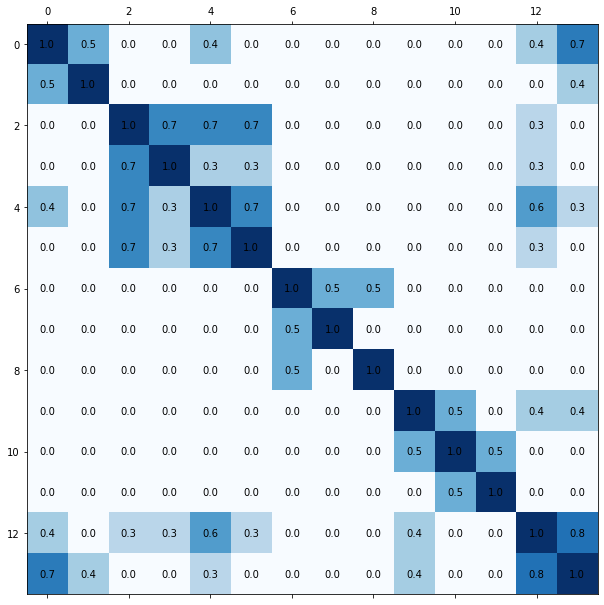

In [260]:
fig, ax = plt.subplots()

ax.matshow(cosine_similarity_matrix, cmap=plt.cm.Blues)

fig.set_size_inches(18.5, 10.5)

for i in range(len(cosine_similarity_matrix)):
    for j in range(len(cosine_similarity_matrix)):
        c = cosine_similarity_matrix[j,i]
        ax.text(i, j, str(round(c, 1)), va='center', ha='center')

In [261]:
def give_first_receipt_by_item(list_of_items, item):
    first_item_receipt =  [val for val in list_of_items if item in val][0]
    return list_of_items.index(first_item_receipt)

In [262]:
def get_closest_no_matching_receipt(receipt_list, index_item_receipt, item, cosine_similarity_matrix):
    recipe_order = np.delete(np.flip(np.argsort(cosine_similarity_matrix[index_item_receipt])), 0)
    for index in recipe_order:
        if item not in receipt_list[index]:
            return index
    return -1

In [263]:
def get_intersection(index_item_receipt, index_closest_receipt):
    l1 = receipt_list[index_closest_receipt]
    l2 = receipt_list[index_item_receipt]
    intesection = [x for x in l1 if x not in l2]
    return intesection

In [264]:
for example_item in receipts_flat_list_no_dups:
    index_item_receipt = give_first_receipt_by_item(receipt_list, example_item)
    index_closest_receipt = get_closest_no_matching_receipt(receipt_list, index_item_receipt, example_item, cosine_similarity_matrix)
    replace_item = get_intersection(index_item_receipt, index_closest_receipt)
    print(f'{example_item} -> {replace_item}')

Rote Zwiebeln -> ['Salatkopf', 'Frühlingszwiebeln']
Rispen-Tomate -> ['Fleisch-Tomate']
Fleisch-Tomate -> ['Rispen-Tomate']
Frühlingszwiebeln -> ['Avocado', 'Rispen-Tomate', 'Knoblauchzehe', 'Rote Zwiebeln']
Tomate -> ['Cocktail-Tomate']
Salatkopf -> ['Rucola']
Rucola -> ['Salatkopf']
Cocktail-Tomate -> ['Rispen-Tomate']
Möhre -> ['Mini-Möhre']
Petersilie -> ['Schnittlauch']
Schnittlauch -> ['Petersilie']
Mini-Möhre -> ['Möhre']
Kartoffeln -> ['Avocado', 'Rispen-Tomate', 'Rote Zwiebeln']
Knoblauchzehe -> ['trockener Knoblauchzehe']
trockener Knoblauchzehe -> ['Knoblauchzehe']
Süßkartoffel -> ['Kartoffeln']
Avocado -> ['Salatkopf']
